# Exercise 1 Implementation

Training

In [121]:
# Imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

# Load the source file with the face data
mat_content = sio.loadmat('face.mat')

In [122]:
# Store face data and classification
face_data = mat_content['X']
face_label = mat_content['l']

# Append the matching data and labels into array 'faces': labels are not needed for PCA training (unsupervised learning)
# but we need it for assessing our algorithms during testing
faces = np.append(face_data, face_label, axis=0)
print(faces, faces.shape)

# Transpose in preparation for division into training and testing material
faces_transposed = faces.T
print (faces_transposed, faces_transposed.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]
 [  1   1   1 ...  52  52  52]] (2577, 520)
[[106 103 103 ...  36  41   1]
 [130 129 130 ...  36  35   1]
 [191 185 174 ...  19  17   1]
 ...
 [ 70  62  83 ...  89  94  52]
 [183 250 163 ...  95 106  52]
 [ 77  72  68 ... 103 110  52]] (520, 2577)


[[144 140 135 ... 199 177  30]
 [ 67  69  62 ...  47  33  41]
 [109 137 183 ...  27  26  44]
 ...
 [222 232 234 ...  23  21  32]
 [ 96  90 105 ... 203 122  37]
 [ 77  72  71 ...  50  38  21]] (416, 2577)
[[ 72  75  68 ...  29  30  25]
 [ 65  66  61 ... 162 158  39]
 [114 113 119 ...  69  68  48]
 ...
 [126 114 111 ...  78  79  42]
 [ 89  87  84 ... 171 171  10]
 [251 249 239 ...  42  43   5]] (104, 2577)


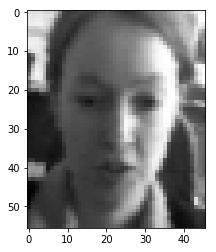

In [123]:
# Divide the data set into training and testing sets: 80% is training, 20% is testing

np.random.shuffle(faces_transposed) # Shuffle the rows (This is why we transposed)
training, test = faces_transposed[:416,:], faces_transposed[416:,:]
print (training, training.shape)
print (test, test.shape)

plt.imshow(np.reshape(training[100, :2576], (46,56)).T, cmap = 'gist_gray') # print 100th image of the training set as a sanity check to make sure we have shuffled along the right dimension of the array

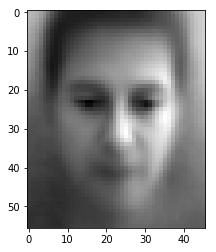

In [124]:
# Now let's start training our image recognition PCA algorithm
# We have face images that are CENTERED and they are of the SAME SIZE (needed for PCA)
# They are normalised for SCALE, ORIENTATION and TRANSLATION

# First, we only need the training and testing set without the labels
# Images are represented as rows
pca_train = training [:, :2576]
pca_test = test [:, :2576]

# Let's compute the mean face image
avg_face = np.mean(pca_train, axis=0)
plt.imshow(np.reshape(avg_face, (46,56)).T, cmap = 'gist_gray')

[[2658.02801405 2486.3759939  2273.72133876 ... -484.85634708
  -544.52829142 -544.68708395]
 [2486.3759939  2685.05643838 2558.89848373 ... -481.98842571
  -536.56837093 -546.9746556 ]
 [2273.72133876 2558.89848373 2720.33542899 ... -480.1233358
  -532.40477071 -537.90994822]
 ...
 [-484.85634708 -481.98842571 -480.1233358  ... 2752.5283781
  2610.49597818 2494.42036104]
 [-544.52829142 -536.56837093 -532.40477071 ... 2610.49597818
  2807.78809172 2717.39154956]
 [-544.68708395 -546.9746556  -537.90994822 ... 2494.42036104
  2717.39154956 2884.82190736]] (2576, 2576)


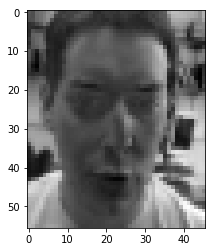

In [125]:
# Now let's subtract the mean face image from all of our training face images
pca_train_norm = pca_train-avg_face # works because of broadcasting
plt.imshow(np.reshape(pca_train_norm[0, :], (46,56)).T, cmap = 'gist_gray') 
# Show the first normalised face image and notice that it is distorted

# Computing the covariance matrix
cov = (np.dot(pca_train_norm.T, pca_train_norm))/416
print (cov, cov.shape)

In [126]:
# Computing the eigenvalues and eigenvectors of the covariance matrix directly and measuring how long it takes

start = time.time()
eigvals, eigvecs = np.linalg.eig(cov) # these are not ordered, so we order them according to the eigenvalues
end = time.time()
print (end-start) # Execution time in seconds

print (eigvals, eigvals.shape)
print (eigvecs, eigvecs.shape)

5.971226930618286
[ 9.28823864e+05+0.00000000e+00j  5.33537289e+05+0.00000000e+00j
  4.43274908e+05+0.00000000e+00j ... -7.44478135e-14-1.67702635e-14j
 -2.24586755e-13+3.71605969e-14j -2.24586755e-13-3.71605969e-14j] (2576,)
[[ 0.0133871 +0.00000000e+00j -0.01285074+0.00000000e+00j
   0.01929774+0.00000000e+00j ... -0.00059936+4.35834037e-05j
  -0.00139824+6.21346522e-04j -0.00139824-6.21346522e-04j]
 [ 0.01470179+0.00000000e+00j -0.01247964+0.00000000e+00j
   0.02113884+0.00000000e+00j ...  0.00049715+1.39466924e-06j
   0.00045578+8.73451598e-05j  0.00045578-8.73451598e-05j]
 [ 0.01552916+0.00000000e+00j -0.0119914 +0.00000000e+00j
   0.02412802+0.00000000e+00j ...  0.00078227-1.17514951e-04j
   0.00042635+2.12967717e-04j  0.00042635-2.12967717e-04j]
 ...
 [-0.00530367+0.00000000e+00j  0.04951309+0.00000000e+00j
  -0.00357794+0.00000000e+00j ...  0.01297553+2.35346460e-03j
   0.00954448+5.08381930e-03j  0.00954448-5.08381930e-03j]
 [-0.00533846+0.00000000e+00j  0.04821626+0.00000000e

In [179]:
# Proving that the eigenvalues and eigenvectors make sense

eig_test_1 = np.dot(cov, eigvecs[:, 0])
eig_test_2 = eigvecs[:, 0]*eigvals[0]

print (eig_test_1-eig_test_2, (eig_test_1-eig_test_2).shape) # The values are basically zero, so the eigenvalue computation is correct

[-4.76575224e-10  7.82165444e-11 -1.18234311e-10 ...  9.09494702e-12
  5.45696821e-12  1.09139364e-11] (2576,)


In [128]:
# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals = np.real(eigvals)
print (eigvals, eigvals.shape)
eigvecs = np.real(eigvecs)
print (eigvecs, eigvecs.shape)

[ 9.28823864e+05  5.33537289e+05  4.43274908e+05 ... -7.44478135e-14
 -2.24586755e-13 -2.24586755e-13] (2576,)
[[ 0.0133871  -0.01285074  0.01929774 ... -0.00059936 -0.00139824
  -0.00139824]
 [ 0.01470179 -0.01247964  0.02113884 ...  0.00049715  0.00045578
   0.00045578]
 [ 0.01552916 -0.0119914   0.02412802 ...  0.00078227  0.00042635
   0.00042635]
 ...
 [-0.00530367  0.04951309 -0.00357794 ...  0.01297553  0.00954448
   0.00954448]
 [-0.00533846  0.04821626 -0.00432286 ...  0.00222614  0.00398775
   0.00398775]
 [-0.0055863   0.04856426 -0.00648965 ...  0.00353071  0.01350211
   0.01350211]] (2576, 2576)


In [181]:
# Order eigenvalues and eigenvectors according to the size of the eigenvalues

eigvals = np.abs(eigvals)
index = eigvals.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]
print (index, index.shape)
print (eigvals, eigvals.shape)

# How many zero eigenvalues do we have?

print (np.linalg.matrix_rank(cov)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals == np.zeros(eigvals.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((eigvals >= np.ones(eigvals.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals.max()) # The largest eigenvalue
print (eigvals[414])
print (eigvals[415])

[   0    1    2 ... 2572 2574 2575] (2576,)
[9.28823864e+05 5.33537289e+05 4.43274908e+05 ... 3.22643410e-15
 2.08055285e-15 2.08055285e-15] (2576,)
415
0
415
928823.8639119731
92.5389538692138
3.6860390423374665e-11


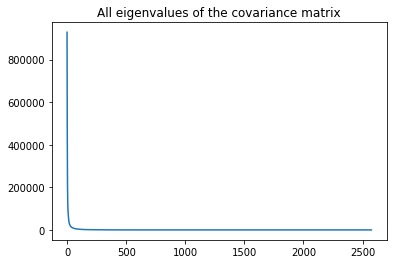

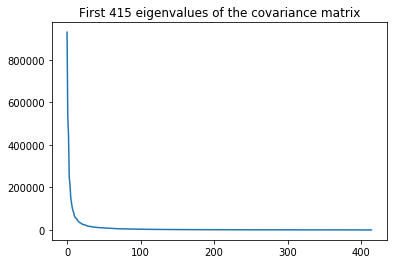

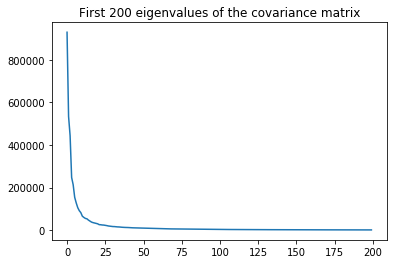

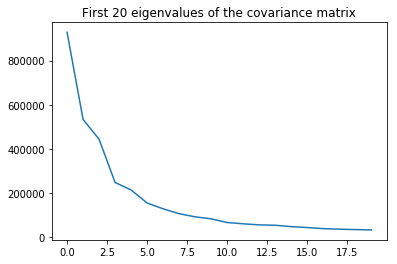

<Figure size 432x288 with 0 Axes>

In [130]:
# Let's visualise the eigenvalues

x = np.arange(0, 2576)

# All of them
plt.plot(x, eigvals) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [131]:
# We keep the largest n eigenvalues and theeir corresponding eigenvectors n<=415, the other eigenvalues are zero

n = 400
eigvecs_best = eigvecs[:, :n]
eigvals_best = eigvals[:n]

# Projecting each training data point to the space spanned by the eigenvectors
proj_pca_train_norm = np.zeros((416, n))
for i in range(416):
    proj_pca_train_norm [i, :] = np.dot(pca_train_norm[i, :], eigvecs_best)
    
print (proj_pca_train_norm, proj_pca_train_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

[[ 1.07265277e+03  1.61671147e+03  1.21393466e+02 ... -8.95677771e+00
   8.68893863e+00  9.59114219e+00]
 [-2.79427480e+02  4.85041584e+02 -5.10097927e+02 ... -2.92966182e+01
  -5.90969148e+00 -1.11390475e+01]
 [-7.98147750e+02  4.01551848e+02  6.71195578e+01 ...  8.59252589e+00
  -1.14839552e+00  2.11823995e+00]
 ...
 [ 1.97280663e+03 -1.08711241e+03  5.42762992e+02 ...  9.28853878e+00
   2.97802409e+00  2.12258852e+00]
 [ 4.42137076e+02  4.27007789e+02  2.33240549e+02 ...  6.79315647e+00
  -2.76171097e+00 -8.03241413e+00]
 [-9.37413515e+00 -1.07430691e+03 -1.09550642e+03 ...  5.70791823e+00
  -1.50547296e+00 -1.26141560e+01]] (416, 400)


In [183]:
# Let's try to compute the eigenvalues using the low-dimensional method

# First we need to compute the new covariance matrix (1/N)A^T*A
cov_ld = np.dot(pca_train_norm, pca_train_norm.T)/416
print (cov_ld, cov_ld.shape) # as we can see it is NxN (and not DxD as the covariance matrix we had before)

[[15807.19779223   633.34565188 -1816.25024193 ...    87.96790133
   2638.94041312 -3068.68135094]
 [  633.34565188  5757.67620384  1173.19569464 ... -3865.04529671
    -65.95018877 -1218.17051052]
 [-1816.25024193  1173.19569464  9706.98922391 ... -5075.47772899
  -1647.64464028 -1795.31448125]
 ...
 [   87.96790133 -3865.04529671 -5075.47772899 ... 18082.63704889
   1536.6888876   1549.83875816]
 [ 2638.94041312   -65.95018877 -1647.64464028 ...  1536.6888876
   5496.651784   -2923.8161339 ]
 [-3068.68135094 -1218.17051052 -1795.31448125 ...  1549.83875816
  -2923.8161339  13743.90104436]] (416, 416)


In [185]:
# Now we compute the eigenvalues and eigenvectors of the new covariance matrix and measure the elapsed time

start_ld = time.time()
eigvals_ld, eigvecs_ld = np.linalg.eig(cov_ld) # these are not ordered, so we order them and the corresponding eigenvalues
end_ld = time.time()
print (end_ld-start_ld)
print (end-start)

# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals_ld = np.real(eigvals_ld)
eigvecs_ld = np.real(eigvecs_ld)

# Order eigenvalues and eigenvectors according to the size of the eigenvalues

eigvals_ld = np.abs(eigvals_ld)
index_ld = eigvals_ld.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals_ld = eigvals_ld[index_ld]
eigvecs_ld = eigvecs_ld[:,index_ld]
print (eigvals_ld, eigvals_ld.shape)

0.058830976486206055
5.971226930618286
[9.28823864e+05 5.33537289e+05 4.43274908e+05 2.47252820e+05
 2.13256424e+05 1.54070009e+05 1.27743379e+05 1.05480412e+05
 9.13624491e+04 8.21947113e+04 6.55199957e+04 5.96621724e+04
 5.49675928e+04 5.31826977e+04 4.70134422e+04 4.26667877e+04
 3.77722254e+04 3.53030561e+04 3.35902227e+04 3.20366425e+04
 2.98103312e+04 2.58013082e+04 2.53066520e+04 2.41399184e+04
 2.37526859e+04 2.25633017e+04 2.12515037e+04 1.95823391e+04
 1.86796867e+04 1.72554516e+04 1.68148180e+04 1.66374565e+04
 1.57008103e+04 1.51890226e+04 1.49268165e+04 1.39952987e+04
 1.35019191e+04 1.30086142e+04 1.26959501e+04 1.25518753e+04
 1.22125963e+04 1.16755666e+04 1.13591378e+04 1.09228236e+04
 1.06980454e+04 1.02595346e+04 1.02493745e+04 9.79929277e+03
 9.50959550e+03 9.30199063e+03 9.13903451e+03 8.79197407e+03
 8.64376802e+03 8.56790828e+03 7.99217107e+03 7.71481929e+03
 7.52306560e+03 7.29829621e+03 7.14995073e+03 7.01893219e+03
 6.95020791e+03 6.85665790e+03 6.60681602e+03 

415
0
415
928823.8639119725
92.538953869214
3.996360560569091e-12


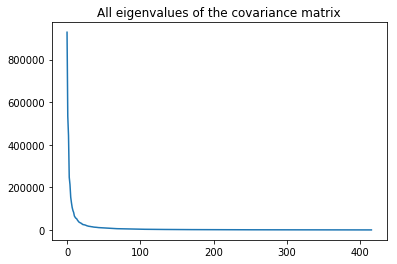

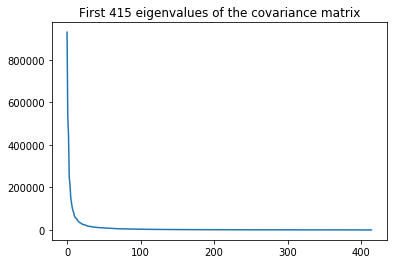

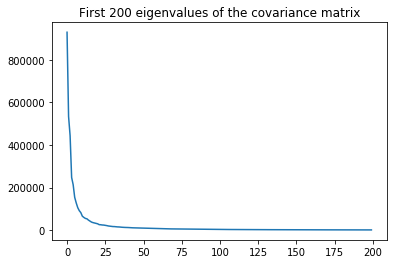

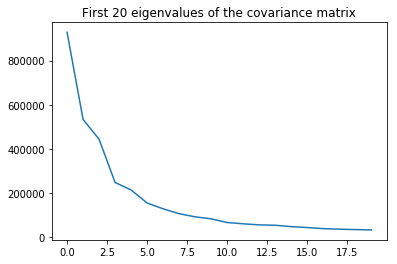

<Figure size 432x288 with 0 Axes>

In [162]:
# How many zero eigenvalues do we have this time?

print (np.linalg.matrix_rank(cov_ld)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals_ld == np.zeros(eigvals_ld.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((eigvals_ld >= np.ones(eigvals_ld.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals_ld.max()) # The largest eigenvalue
print (eigvals_ld[414])
print (eigvals_ld[415])

# Let's visualise the eigenvalues

x = np.arange(0, 416)

# All of them
plt.plot(x, eigvals_ld) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals_ld[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals_ld[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals_ld[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [188]:
# What is the relationship between the eigenvalues and the eigenvectors resulting from the two methods

print (eigvals[:416]-eigvals_ld, (eigvals[:416]-eigvals_ld).shape)
# Therefore the eigenvalues are identical

print(eigvecs_ld, eigvecs_ld.shape)
print ((pca_train_norm.T).shape)
eigvecs_ld_cmp = np.dot(pca_train_norm.T, eigvecs_ld)
print (eigvecs_ld_cmp, eigvecs_ld_cmp.shape)
print (eigvecs[:, :416], eigvecs[:, :416].shape)
print (eigvecs[:, :416]-eigvecs_ld_cmp)

[ 5.82076609e-10  1.16415322e-09  5.23868948e-10  2.03726813e-10
  3.78349796e-10 -1.16415322e-10 -2.32830644e-10  7.27595761e-11
  7.27595761e-11 -1.30967237e-10  0.00000000e+00  1.67347025e-10
  2.18278728e-10 -1.45519152e-10  1.38243195e-10  4.36557457e-11
  4.07453626e-10  1.45519152e-11 -2.54658516e-10  3.34694050e-10
  7.27595761e-11  5.82076609e-11  5.82076609e-11 -1.09139364e-11
 -7.27595761e-11  6.91215973e-11  1.34605216e-10  1.01863407e-10
  8.73114914e-11 -2.54658516e-11  2.18278728e-11  1.81898940e-11
  1.58252078e-10  1.09139364e-11 -9.09494702e-12 -4.72937245e-11
  6.73026079e-11  1.27329258e-11 -5.63886715e-11  2.36468622e-11
 -1.81898940e-12  6.91215973e-11  1.81898940e-11 -5.45696821e-12
 -1.81898940e-12  0.00000000e+00  7.27595761e-12  7.27595761e-12
 -6.18456397e-11  2.18278728e-11 -3.45607987e-11 -2.72848411e-11
 -5.63886715e-11  1.09139364e-11 -5.36601874e-11  1.09139364e-11
 -2.45563569e-11 -2.36468622e-11 -1.18234311e-11 -3.63797881e-11
 -1.27329258e-11  1.81898

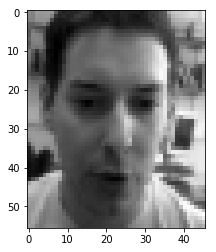

In [170]:
# Let's try to reconstruct one face image, just as a sanity check to see if we can still see a face (worse quality of course, because we did a lossy transformation on it)
face_check = avg_face + np.dot(eigvecs_best, proj_pca_train_norm[0, :])
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

Testing

In [10]:
# Now that we've trained our model, let's test it on our testing data set
# First, let's normalise the testing set (subtract the average face from all face images)

pca_test_norm = pca_test-avg_face # Works because of broadcasting
print (pca_test_norm, pca_test_norm.shape)

# Then let's project each testing image to the eigenspace (space spanned by the best eigenvectors)
proj_pca_test_norm = np.zeros((104, n))
for i in range(104):
    proj_pca_test_norm [i, :] = np.dot(pca_test_norm[i, :], eigvecs_best)

print (proj_pca_test_norm, proj_pca_test_norm.shape)

# Now in array proj_pca_test_norm, in each row, we have the projected coordinates for each face image

[[-15.76682692 -16.94951923 -16.39182692 ... -28.58653846 -27.12740385
  -26.43509615]
 [ 48.23317308  52.05048077  30.60817308 ... -65.58653846 -60.12740385
  -55.43509615]
 [ -7.76682692  17.05048077   9.60817308 ...  16.41346154  13.87259615
   16.56490385]
 ...
 [ 68.23317308  66.05048077  63.60817308 ... -42.58653846 -43.12740385
  -42.43509615]
 [ 10.23317308   8.05048077  13.60817308 ... -64.58653846 -64.12740385
  -58.43509615]
 [-39.76682692 -39.94951923 -36.39182692 ...  60.41346154  67.87259615
   68.56490385]] (104, 2576)
[[-3.05887559e+02 -5.26642542e+02 -4.49583093e+02 ...  1.58641309e+01
   2.22578800e+01 -5.73931869e+00]
 [-2.47810171e+03  5.19898793e+02 -1.86087519e+02 ... -7.52209272e+00
  -4.66733547e+00  3.52464724e+00]
 [-8.37901255e+02 -2.01510237e+02  9.02842084e+02 ...  9.41394305e+00
  -2.36555103e+01 -1.88456877e+00]
 ...
 [-1.54975643e+03 -3.02230465e+02  6.29742521e+02 ... -7.03841765e+00
   1.70657814e+01  5.13391521e+00]
 [-3.89673779e+02  5.56864815e+02  

[2885.28288925 2583.64536092 2394.43633263 2344.7642421  2737.4075968
 3298.76103272 3570.70180091 2917.42632315 2834.71380408 2827.48091966
 2178.32374798 2444.78206616 3040.74338789 2149.91775448 3075.94056364
 3095.59741424 2689.92701593 2819.25705657 2525.27035207 3266.44077721
 2890.59913357 1976.04462273 2720.61378204 2888.94502388 2311.78531681
 2668.91988471 2957.60466442 2601.82846303 2251.50779502 2760.59166684
 2456.68136945 3290.53207719 2291.92634066 2534.74621038 2504.2398749
 2088.10113525 2232.94521899 2787.71938169 2389.87140889 2783.54528453
 1965.61602329 2268.7226254  2134.7750118  2728.41993671 2728.34150191
 3080.86422145 2078.87790671 2659.06343494 2457.37366939 2659.94856173
 2157.35077144 2738.46258894 2372.44354011 2976.66833071 2536.70225904
 2503.63562665 2821.91129397 2742.92696786 2294.71334833 2040.07606501
 2938.94527867 2910.92018974 2546.25653677 2938.77021065 2939.53624761
 2270.69006054 2987.78251401 3433.13768309 3103.52289359 2883.34343272
 2567.40

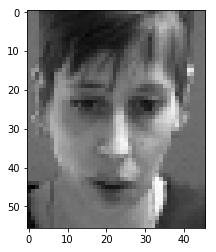

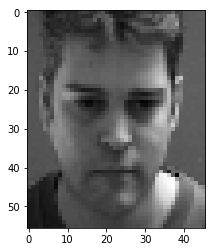

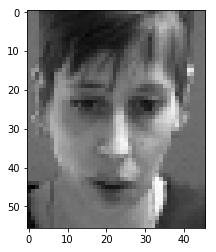

In [11]:
# Let's classify the first image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

distances = np.zeros(416)

for i in range(416):
    distances[i] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[0, :])
    
print (distances, distances.shape)

smallest_distance = distances.min()
smallest_index = distances.argmin()
print (smallest_distance, smallest_index)

# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576])
# Which identity does it actually belong to?
print (test[0, 2576])

# Print the picture that our picture is the closest to
plt.imshow(np.reshape(pca_train[smallest_index, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

# Print our actual image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')

In [12]:
# Now let's do this for all of the testing images

distances = np.zeros((416, 104)) # In each row we store the distances (1 column = 1 testing image's distances)

for k in range (104):
    for i in range(416):
        distances[i, k] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[k, :])
        
# Now we have in each column the distances of the testing images from each of the training images.
# Next step is to find the minimum of each column, and the corresponding row index (per column)
print (distances, distances.shape)

smallest_distance = distances.min(axis=0) # min per columns
smallest_index = distances.argmin(axis=0)
print (smallest_distance, smallest_distance.shape)
print (smallest_index, smallest_index.shape)

# Get the smallest distance image's label
#detected_label = np.zeros (104)
#for j in range(104):
#    detected_label[j] = training[smallest_index[j], 2576]
#print (detected_label, detected_label.shape)

actual_label = test [:, 2576].T

print (actual_label, actual_label.shape)


# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576], training[smallest_index, 2576].shape)

same = (training[smallest_index, 2576]==actual_label)

print (same, same.shape)

percentage = np.sum(same)/104

print (percentage)


[[2885.28288925 3459.37357104 3155.49763361 ... 2797.38730578
  3353.87252838 2481.23048192]
 [2583.64536092 4017.22410428 2966.10574925 ... 3013.50223801
  3353.60655662 2852.55617024]
 [2394.43633263 4002.82843799 3819.88760512 ... 3546.8952252
  3584.4468104  3904.93133158]
 ...
 [2566.37689185 3706.14874283 2775.67006608 ... 2990.36164009
  2619.04256105 3132.09062838]
 [2999.11109348 3811.7772107  2549.54178545 ... 3128.17642382
  2466.84027384 3262.32044784]
 [2858.79631157 3352.1880174  2304.04043275 ... 2483.93050195
  2468.06643683 2804.19608879]] (416, 104)
[1771.59824764 1881.50803984 1751.50858284 1284.02454185 1451.45372646
 1773.54118033 1655.22251669 1262.19894792 1587.62289485 1423.8826589
  899.17085396 1338.45033627 1268.0909666   691.62020583 1363.2919338
 1738.27058681 1848.30612443 1858.94040802 2036.16595663  786.60221209
 1810.45117029 1390.10768407 1194.20622559 1580.43133751 1828.28051195
 1891.54926231 1637.4104105  1040.07900321 1634.89425659 1190.19885591
 1

0.000988631999998546
0.00021263099999990764
[9.06444846e+05 5.53288321e+05 4.59362658e+05 2.58876875e+05
 2.15633970e+05 1.56860877e+05 1.26412705e+05 1.11166920e+05
 9.39248645e+04 8.60693009e+04 6.67779708e+04 5.93077157e+04
 5.13973757e+04 4.97597938e+04 4.60466833e+04 4.05500194e+04
 3.76406394e+04 3.54736453e+04 3.44932280e+04 3.30006774e+04
 3.01810957e+04 2.66199267e+04 2.60246177e+04 2.44407354e+04
 2.36280772e+04 2.23365345e+04 2.09458922e+04 2.00118474e+04
 1.89523029e+04 1.84574882e+04 1.81523001e+04 1.64749285e+04
 1.60095091e+04 1.54031067e+04 1.45944124e+04 1.40968301e+04
 1.37918997e+04 1.32297161e+04 1.28029392e+04 1.26283098e+04
 1.21899467e+04 1.16251179e+04 1.11598644e+04 1.09272835e+04
 1.07810086e+04 1.02233594e+04 9.86544700e+03 9.75379168e+03
 9.44698154e+03 9.21668964e+03 9.03157770e+03 8.81312397e+03
 8.40210948e+03 8.06547524e+03 8.03321698e+03 7.84453783e+03
 7.67300034e+03 7.37797894e+03 7.37107246e+03 7.17078499e+03
 6.93498379e+03 6.78157253e+03 6.67339871

In [15]:
def highdimension():
    eigvals_hd, eigvecs_hd = np.linalg.eig(cov)
    return

#def lowdimension():
#    eigvals2_ld, eigvecs2_ld = np.linalg.eig(cov2)
#    return

def donothing():
    x=1123
    return

#mem_low = max(memory_usage(proc=lowdimension))
mem_high = max(memory_usage(proc=highdimension))
mem_nothing = max(memory_usage(proc=donothing))

#print("Maximum memory used by low dimension way: {0} MiB".format(str(mem_low)))
print("Maximum memory used by high dimension way: {0} MiB".format(str(mem_high)))
print("Maximum memory used by donothing: {0} MiB".format(str(mem_nothing)))

# Check it tomorrow, strange that the memory usage of donothing and lowdimension if the same, but don't know why yet

Maximum memory used by high dimension way: 632.2578125 MiB
Maximum memory used by donothing: 428.42578125 MiB
